In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, kstest, normaltest,skew,kurtosis
import warnings
from scipy.stats import f_oneway, chi2_contingency
import matplotlib.pyplot as plt
from matplotlib import MatplotlibDeprecationWarning
from scipy.stats import pointbiserialr


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Import Database**




In [108]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [109]:
train.drop(columns=['FILENAME'], inplace = True)
train.drop(columns=['id'], inplace = True)

In [110]:
test.drop(columns=['FILENAME'], inplace = True)
test.drop(columns=['id'], inplace = True)

# **Explore Data**

In [111]:
train.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [112]:
test.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,0.081395,3.0,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,0.069183,3.0,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,0.050344,2.0,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,0.059065,3.0,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,0.035754,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [113]:
test.shape

(10000, 53)

In [114]:
train.shape

(140404, 54)

# **Data Type**

## Categorical Features

In [82]:
# Identifying float columns (0, 1, or NaN)
binary_float_features = train.select_dtypes(include=['float']).columns
binary_like_features = binary_float_features[train[binary_float_features].isin([0, 1, float('nan')]).all()]

# Categorical columns + binary-like float columns
categorical_features = train.select_dtypes(include=['object', 'category']).columns
all_categorical_features = list(binary_like_features) + list(categorical_features)

all_categorical_features = [feature for feature in all_categorical_features if feature not in ['NoOfURLRedirect', 'NoOfSelfRedirect','FILENAME','URL', 'Domain', 'Title']]
all_categorical_features.append('label')

# Create the DataFrame with unique values for categorical features
unique_values = train[all_categorical_features].nunique()
unique_values2 = pd.DataFrame(unique_values, columns=['Unique Value']).reset_index()
unique_values2.rename(columns={'index': 'Feature'}, inplace=True)

# Reset the index
unique_values2.index = range(1, len(unique_values2) + 1)

print("\nNumber of Unique Values for Categorical Features (including 0/1/NaN in float):")
unique_values2



Number of Unique Values for Categorical Features (including 0/1/NaN in float):


,Feature,Unique Value
1,IsDomainIP,2
2,HasObfuscation,2
3,IsHTTPS,2
4,HasTitle,2
5,HasFavicon,2
6,Robots,2
7,IsResponsive,2
8,HasDescription,2
9,HasExternalFormSubmit,2
10,HasSocialNet,2


## Numerical Features

In [84]:
exclude_features = ['FILENAME', 'URL', 'Domain',  'Title', 'id']
numerical_features = [feature for feature in train.columns.difference(all_categorical_features) if feature not in exclude_features]

## Text Features

In [100]:
discrete_features = ['URL', 'Domain', 'Title']

In [101]:
categorical_features_df = pd.DataFrame(all_categorical_features, columns=['Categorical Features'])
categorical_features_df.index = range(1, len(categorical_features_df) + 1)

numerical_features_df = pd.DataFrame(numerical_features, columns=['Numerical Features'])
numerical_features_df.index = range(1, len(numerical_features_df) + 1)

text_features_df = pd.DataFrame(discrete_features, columns=['Text Features'])
text_features_df.index = range(1, len(text_features_df) + 1)

In [102]:
categorical_features_df

,Categorical Features
1,IsDomainIP
2,HasObfuscation
3,IsHTTPS
4,HasTitle
5,HasFavicon
6,Robots
7,IsResponsive
8,HasDescription
9,HasExternalFormSubmit
10,HasSocialNet


In [103]:
numerical_features_df

,Numerical Features
1,CharContinuationRate
2,DegitRatioInURL
3,DomainLength
4,DomainTitleMatchScore
5,LargestLineLength
6,LetterRatioInURL
7,LineOfCode
8,NoOfAmpersandInURL
9,NoOfCSS
10,NoOfDegitsInURL


In [104]:
text_features_df

,Text Features
1,URL
2,Domain
3,Title


# **Exploratory Data Analysis**

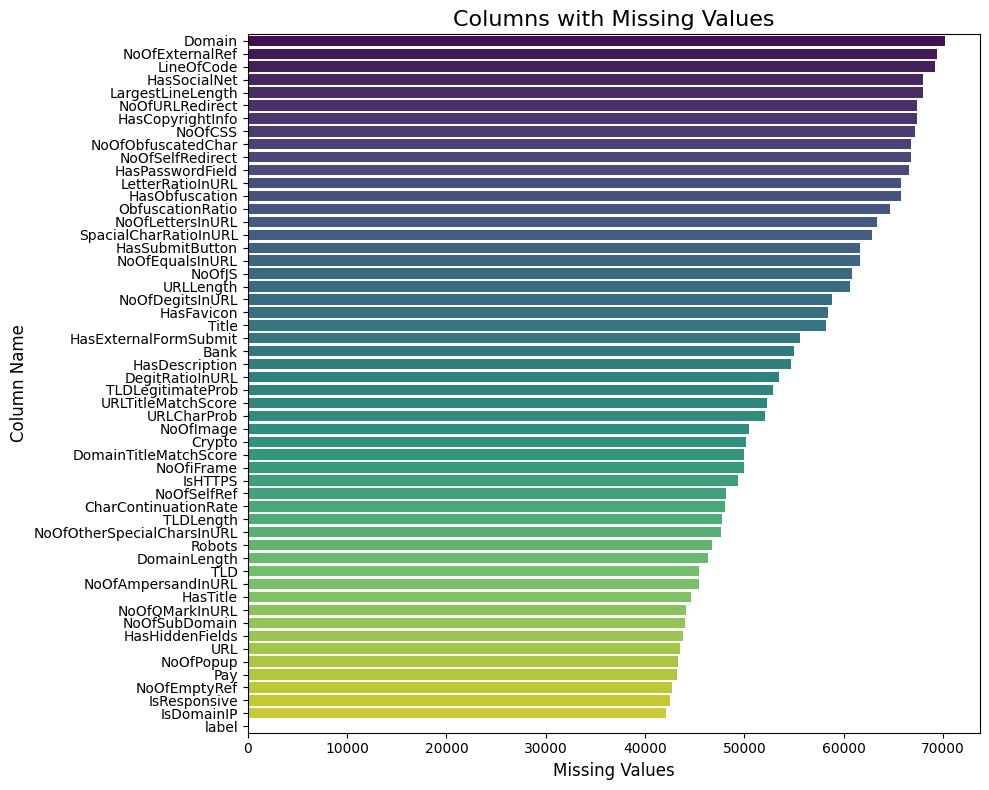

Number of Columns : 54


In [89]:
# Suppress all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

missing_values = train.isnull().sum()
missing_filtered = missing_values.sort_values(ascending=False)

# Visualization with plasma color palette
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_filtered.values, y=missing_filtered.index, palette="viridis")
plt.title(f"Columns with Missing Values", fontsize=16)
plt.xlabel("Missing Values", fontsize=12)
plt.ylabel("Column Name", fontsize=12)
plt.tight_layout()
plt.show()

print(f"Number of Columns : {len(missing_filtered)}")

# **Split Data**

In [90]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = train.copy()

X = train.drop(columns=['label'])  # without target variable
y = train['label']  # Target variable

# Split training set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [91]:
X_train

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
28021,https://www.yc-tp.com,NaN,NaN,13.0,0.0,com,0.600000,0.522907,NaN,NaN,...,0.0,0.0,NaN,NaN,30.0,12.0,NaN,NaN,0.0,138.0
71026,NaN,25.0,NaN,18.0,NaN,com,NaN,NaN,0.061236,3.0,...,NaN,0.0,NaN,1.0,88.0,11.0,16.0,211.0,0.0,NaN
89927,https://www.autodesk.co.uk,25.0,NaN,18.0,0.0,NaN,0.818182,0.028555,NaN,NaN,...,0.0,NaN,0.0,1.0,31.0,NaN,25.0,NaN,1.0,NaN
94654,https://www.marketmanila.com,27.0,www.marketmanila.com,20.0,0.0,NaN,1.000000,NaN,0.066401,3.0,...,NaN,1.0,0.0,NaN,NaN,26.0,23.0,105.0,0.0,NaN
35275,https://www.re-course.org,NaN,NaN,17.0,0.0,org,NaN,NaN,NaN,3.0,...,1.0,1.0,0.0,1.0,NaN,11.0,17.0,23.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,https://www.gemathis.com,23.0,www.gemathis.com,16.0,0.0,com,1.000000,0.522907,NaN,3.0,...,0.0,NaN,0.0,1.0,NaN,2.0,NaN,106.0,7.0,NaN
119879,NaN,24.0,www.mural24.co.uk,NaN,0.0,uk,0.800000,NaN,NaN,2.0,...,0.0,1.0,0.0,NaN,166.0,3.0,7.0,NaN,1.0,NaN
103694,NaN,34.0,NaN,27.0,0.0,NaN,1.000000,NaN,NaN,3.0,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,42.0,NaN,25.0
131932,https://www.leinsterrugby.ie,27.0,NaN,20.0,0.0,ie,NaN,0.001588,0.052675,NaN,...,1.0,0.0,0.0,1.0,NaN,NaN,57.0,NaN,0.0,331.0


In [92]:
train

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.000000,0.079963,0.059055,3.0,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.000000,0.522907,0.064465,3.0,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.000000,0.522907,NaN,3.0,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.000000,0.522907,NaN,NaN,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1


In [93]:
test

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,0.081395,3.0,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,0.069183,3.0,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,0.050344,2.0,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,0.059065,3.0,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,0.035754,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://756-107694hr4g.weeblysite.com/,38.0,756-107694hr4g.weeblysite.com,29.0,0.0,com,NaN,0.522907,NaN,3.0,...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9996,NaN,39.0,www.interactive-sonification.org,32.0,0.0,org,0.541667,0.079963,0.066188,3.0,...,0.0,NaN,NaN,0.0,1.0,NaN,5.0,23.0,0.0,9.0
9997,https://fuchsiabrownsysadmin--ficohsa121.repl....,NaN,NaN,NaN,0.0,NaN,0.675676,0.005977,0.052057,2.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9998,https://www.benoit-mccarthy.com,NaN,www.benoit-mccarthy.com,23.0,0.0,NaN,0.600000,0.522907,0.063081,3.0,...,0.0,0.0,0.0,1.0,11.0,22.0,NaN,45.0,NaN,NaN


# **Data Cleaning**

In [94]:
# Drop rows with NaN values and overwrite the train DataFrame
train = train.dropna()

# Reset the index
train.reset_index(drop=True, inplace=True)

In [107]:
numerical_features

['CharContinuationRate',
 'DegitRatioInURL',
 'DomainLength',
 'DomainTitleMatchScore',
 'LargestLineLength',
 'LetterRatioInURL',
 'LineOfCode',
 'NoOfAmpersandInURL',
 'NoOfCSS',
 'NoOfDegitsInURL',
 'NoOfEmptyRef',
 'NoOfEqualsInURL',
 'NoOfExternalRef',
 'NoOfImage',
 'NoOfJS',
 'NoOfLettersInURL',
 'NoOfObfuscatedChar',
 'NoOfOtherSpecialCharsInURL',
 'NoOfPopup',
 'NoOfQMarkInURL',
 'NoOfSelfRedirect',
 'NoOfSelfRef',
 'NoOfSubDomain',
 'NoOfURLRedirect',
 'NoOfiFrame',
 'ObfuscationRatio',
 'SpacialCharRatioInURL',
 'TLDLegitimateProb',
 'TLDLength',
 'URLCharProb',
 'URLLength',
 'URLTitleMatchScore']

In [116]:
from sklearn.impute import SimpleImputer

# Define the imputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the numerical features
train[numerical_features] = imputer.fit_transform(train[numerical_features])